Проект- Зарплаты в Сан- Франциско

Бизнес-задача: Исследовать данные по зарплатам в Сан- Франциско. Найти факторы,способные оказывать неблагоприятное влияние на расходы по оплате труда по департаментам  Сан- Франциско. 
-сгруппировать данные по департаментам; 
-посмотреть, как распределяется бюджет по разным департаментам с течением времени; 
-посмотреть, как распределяются базовая оплата, сверхурочная работа и льготы между разными группами;
-посмотреть, какое количество людей в каждом департаменте; -найти факторы, способные оказывать неблагоприятное влияние на расходы по оплате труда по департаментам  Сан- Франциско; 
-на базе линейной регрессии построить прогноз по тому, какие будут зарплаты в следующий год по каждому департаменту.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline
import re 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df = pd.read_csv('Salaries1.csv',  sep=',')
df.head()

C:\Users\HP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148049 non-null object
OvertimePay         148654 non-null object
OtherPay            148654 non-null object
Benefits            112495 non-null object
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              38119 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


Преобразование числовых данных  из object в float64 

In [4]:
cols=["BasePay","OvertimePay","OtherPay","Benefits"]
df[cols]=df[cols].apply(pd.to_numeric,errors='coerce')

In [5]:
#Количество незаполненных значений 
df.isnull().sum(axis=0)

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

I. Предобработка данных

I.I. Анализ уникальных значений по df* помещен в раздел "Справочно. Анализ уникальных значений." 

I.II. Процедуры поиска и удаления  неинформативных данных из df

Поиск и удаления  неинформативных данных из df по стокам с целью удаления всей строки

In [6]:
df[df["EmployeeName"] =='Not provided'] #выявлено 4 значения EmployeeName-Not provided заполненные нулевыми данными

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148646,148647,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,NaN,San Francisco,NaN


In [7]:
df = df.drop(df[df["EmployeeName"] =='Not provided'].index) 
df[df["JobTitle"] =='Not provided']#Проверка

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


In [8]:
df = df.drop(df[df['TotalPayBenefits'] == 0].index)
df = df.drop(df[df['TotalPayBenefits'] <0].index)
print(df[df['TotalPayBenefits']==0]) #проверка
print(df[df['TotalPayBenefits']<0])#проверка

Empty DataFrame
Columns: [Id, EmployeeName, JobTitle, BasePay, OvertimePay, OtherPay, Benefits, TotalPay, TotalPayBenefits, Year, Notes, Agency, Status]
Index: []
Empty DataFrame
Columns: [Id, EmployeeName, JobTitle, BasePay, OvertimePay, OtherPay, Benefits, TotalPay, TotalPayBenefits, Year, Notes, Agency, Status]
Index: []


***Удаление дубликатов. Преобразуем df для удаления дубликатов. Искать дубликаты будем сразу по 3 признакам
"EmployeeName", "JobTitle",'Year'. Проведем предобработку  колонок "EmployeeName", "JobTitle"

In [9]:
def prepare_date_for_drop_dupl_1(jobtitle):
    jobtitle_lower = jobtitle.lower()
    reg = re.compile('[^a-zA-Z ]')
    jobtitle_lower_clear = reg.sub('',jobtitle_lower)
    return jobtitle_lower_clear

In [10]:
def prepare_date_for_drop_dupl_2(employeename):
    employeename_lower = employeename.lower()
    reg = re.compile('[^a-zA-Z ]')
    employeename_lower_clear = reg.sub('',employeename_lower)
    return employeename_lower_clear

In [11]:
df1=df.copy()

In [12]:
df1['JobTitle_key_words_list']=df1['JobTitle'].apply(prepare_date_for_drop_dupl_1)
df1['EmployeeName_key_words_list']=df1['EmployeeName'].apply(prepare_date_for_drop_dupl_2)


In [13]:
#Определим  дубликаты  по нескольким признакам  df1.
df1[df[["EmployeeName", "JobTitle",'Year']].duplicated()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,JobTitle_key_words_list,EmployeeName_key_words_list
3689,3690,STANLEY LEE,POLICE OFFICER III,112405.47,7589.08,14006.52,NaN,134001.07,134001.07,2011,NaN,San Francisco,NaN,police officer iii,stanley lee
3763,3764,MATTHEW SULLIVAN,POLICE OFFICER II,95636.67,8882.45,28831.58,NaN,133350.70,133350.70,2011,NaN,San Francisco,NaN,police officer ii,matthew sullivan
4821,4822,CHRISTOPHER ANDERSON,POLICE OFFICER III,112441.78,7224.09,5703.71,NaN,125369.58,125369.58,2011,NaN,San Francisco,NaN,police officer iii,christopher anderson
5250,5251,RYAN JONES,POLICE OFFICER I,99964.19,8528.02,14471.11,NaN,122963.32,122963.32,2011,NaN,San Francisco,NaN,police officer i,ryan jones
7326,7327,MICHAEL TSANG,ENGINEER,111613.03,0.00,0.00,NaN,111613.03,111613.03,2011,NaN,San Francisco,NaN,engineer,michael tsang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148266,148267,Hilda Erlenbach,Special Nurse,352.52,0.00,0.00,80.38,352.52,432.90,2014,NaN,San Francisco,PT,special nurse,hilda erlenbach
148324,148325,Kristen E Sligar,Nurse Practitioner,291.65,0.00,0.00,67.99,291.65,359.64,2014,NaN,San Francisco,PT,nurse practitioner,kristen e sligar
148366,148367,Maribel Amodo,Special Nurse,247.16,0.00,0.00,52.67,247.16,299.83,2014,NaN,San Francisco,PT,special nurse,maribel amodo
148405,148406,Amelie E Bullard,Special Nurse,217.93,0.00,0.00,31.16,217.93,249.09,2014,NaN,San Francisco,PT,special nurse,amelie e bullard


In [14]:
df1=df1.drop_duplicates(subset=["EmployeeName_key_words_list", "JobTitle_key_words_list",'Year'], keep='last')
#Обнаруженны дубликаты. Удаляем, сохраняя последнее зафиксированное значение по зарплате сотрудника в рассматриваемом  году.
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148038 entries, 0 to 148625
Data columns (total 15 columns):
Id                             148038 non-null int64
EmployeeName                   148038 non-null object
JobTitle                       148038 non-null object
BasePay                        147437 non-null float64
OvertimePay                    148038 non-null float64
OtherPay                       148038 non-null float64
Benefits                       112079 non-null float64
TotalPay                       148038 non-null float64
TotalPayBenefits               148038 non-null float64
Year                           148038 non-null int64
Notes                          0 non-null float64
Agency                         148038 non-null object
Status                         37998 non-null object
JobTitle_key_words_list        148038 non-null object
EmployeeName_key_words_list    148038 non-null object
dtypes: float64(7), int64(2), object(6)
memory usage: 18.1+ MB


Поиск и удаления  неинформативных признаков из df (по колонкам).

In [15]:
#- по колонке Notes полностью  отсутствуют данные;
#- колонка Status  не заполнена данными на 74,4% ** принято решение удалить;
#-колонка Agency заполнена только одним  значением 'San Francisco'* - принято решение удалить.

df1=df1.drop(['Notes','Status','Agency' ],axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148038 entries, 0 to 148625
Data columns (total 12 columns):
Id                             148038 non-null int64
EmployeeName                   148038 non-null object
JobTitle                       148038 non-null object
BasePay                        147437 non-null float64
OvertimePay                    148038 non-null float64
OtherPay                       148038 non-null float64
Benefits                       112079 non-null float64
TotalPay                       148038 non-null float64
TotalPayBenefits               148038 non-null float64
Year                           148038 non-null int64
JobTitle_key_words_list        148038 non-null object
EmployeeName_key_words_list    148038 non-null object
dtypes: float64(6), int64(2), object(4)
memory usage: 14.7+ MB


In [16]:
df1.isnull().sum(axis=0)

Id                                 0
EmployeeName                       0
JobTitle                           0
BasePay                          601
OvertimePay                        0
OtherPay                           0
Benefits                       35959
TotalPay                           0
TotalPayBenefits                   0
Year                               0
JobTitle_key_words_list            0
EmployeeName_key_words_list        0
dtype: int64

***преобразование object-float перенесено сразу после импорта данных

Заполнение пропусков нулевыми  значениями 

In [17]:
df1 = df1.fillna(0)
df1.isnull().sum(axis=0)

Id                             0
EmployeeName                   0
JobTitle                       0
BasePay                        0
OvertimePay                    0
OtherPay                       0
Benefits                       0
TotalPay                       0
TotalPayBenefits               0
Year                           0
JobTitle_key_words_list        0
EmployeeName_key_words_list    0
dtype: int64

I.III.Горизонтальная арифметическая проверка 


In [18]:
df_gor_check=df1.copy()

In [19]:
df_gor_check['sum'] = df1[['BasePay','OvertimePay','OtherPay']].sum(axis=1)-df['TotalPay']
df_gor_check['sum1'] = df1[['BasePay','OvertimePay','OtherPay','Benefits']].sum(axis=1)-df['TotalPayBenefits']

In [20]:
print(np.all(np.isclose(df_gor_check['sum'],0))) # близкие у нулю значения
print(np.all(np.isclose(df_gor_check['sum1'],0)))

True
True


In [21]:
cols=["sum","sum1"]
df_gor_check[cols]=df_gor_check[cols].apply(np.round)

In [22]:
#Проверка
print(df_gor_check[df_gor_check['sum']!=0])
print(df_gor_check[df_gor_check['sum1']!=0])

Empty DataFrame
Columns: [Id, EmployeeName, JobTitle, BasePay, OvertimePay, OtherPay, Benefits, TotalPay, TotalPayBenefits, Year, JobTitle_key_words_list, EmployeeName_key_words_list, sum, sum1]
Index: []
Empty DataFrame
Columns: [Id, EmployeeName, JobTitle, BasePay, OvertimePay, OtherPay, Benefits, TotalPay, TotalPayBenefits, Year, JobTitle_key_words_list, EmployeeName_key_words_list, sum, sum1]
Index: []


In [23]:
#Рабочий df после предобработки данных
df1.head(1)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,JobTitle_key_words_list,EmployeeName_key_words_list
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,0.0,567595.43,567595.43,2011,general managermetropolitan transit authority,nathaniel ford


Вывод: В результате предобработки данных исходного df:
-выявлены и удалены неинформативные данные, содержащиеся в строках;
-выявлены и удалены неинформативные признаки;
-преобразован формат числовых данных для возможности дальнейшего расчета;
-заполнены пропущенные значения в данных;
-удалены дубликаты;
-произведена горизонтальная арифметическая проверка данных.

II. Группировка данных по департаментам.

С целью отнесения сотрудников к определенному  департаменту осуществлена разметка данных на основании информации о 
профессии/должности в колонке 'JobTitle'с использованием информации по методикам группировки. 


In [24]:
print(df1["JobTitle"].unique())

['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY'
 'CAPTAIN III (POLICE DEPARTMENT)' 'WIRE ROPE CABLE MAINTENANCE MECHANIC'
 ... 'Forensic Toxicologist Supervis' 'Conversion' 'Cashier 3']


In [25]:
df1["JobTitle"].value_counts().head(5)

Transit Operator                7012
Special Nurse                   4326
Registered Nurse                3736
Public Svc Aide-Public Works    2516
Police Officer 3                2413
Name: JobTitle, dtype: int64

In [26]:
df1["JobTitle"].nunique()

2158

In [27]:
df2=df1.copy()

In [28]:
def group1(JobTitle_key_words_list):
    if 'police' in JobTitle_key_words_list or 'investigator' in JobTitle_key_words_list or  'invstgtor' in JobTitle_key_words_list or  'captain' in JobTitle_key_words_list or 'officer' in JobTitle_key_words_list or 'lieutenant' in JobTitle_key_words_list  or 'inspector' in JobTitle_key_words_list or 'sheriff' in JobTitle_key_words_list or "parking control" in JobTitle_key_words_list or 'sergeant' in JobTitle_key_words_list or 'deputy probation officer'in JobTitle_key_words_list or 'child support' in JobTitle_key_words_list or 'claims investigator' in JobTitle_key_words_list : 
        return 'police'
    elif 'medic' in JobTitle_key_words_list or 'xray laboratory aide' in JobTitle_key_words_list or 'med' in JobTitle_key_words_list or 'pharm' in JobTitle_key_words_list  or 'health' in JobTitle_key_words_list  or 'epidemi' in JobTitle_key_words_list or 'nurs'in JobTitle_key_words_list or 'dentist' in JobTitle_key_words_list  or 'psychol' in JobTitle_key_words_list  or "diet"  in JobTitle_key_words_list or 'patient' in JobTitle_key_words_list or 'physician' in JobTitle_key_words_list or 'therapist'in JobTitle_key_words_list or 'anesthe' in JobTitle_key_words_list  :
        return 'medical'
    
    elif 'fire' in JobTitle_key_words_list:
        return 'fire'
    elif 'operator' in JobTitle_key_words_list:
        return 'operator'
    
    elif ('worker' in JobTitle_key_words_list or  'repairer'in JobTitle_key_words_list or 'general laborer'in JobTitle_key_words_list or "carpenter" in JobTitle_key_words_list  or 'plumber' in JobTitle_key_words_list) and ( "workers compensation adjuster" not in JobTitle_key_words_list):
        return 'worker'
    
    elif 'publ' in JobTitle_key_words_list or 'water conservation admin' in JobTitle_key_words_list or 'youth commission advisor' in JobTitle_key_words_list or 'school' in JobTitle_key_words_list or 'examin' in JobTitle_key_words_list or 'libr' in JobTitle_key_words_list or 'social' in JobTitle_key_words_list :
        return 'public'
     
     
        
    elif 'attorney' in JobTitle_key_words_list or 'court' in JobTitle_key_words_list or  'counselor' in JobTitle_key_words_list or 'cnslr'in JobTitle_key_words_list or 'mfcc' in JobTitle_key_words_list or 'atty' in JobTitle_key_words_list:
        return 'attorney'
       
   
    elif 'engineer' in JobTitle_key_words_list or 'eng'in JobTitle_key_words_list or 'program' in JobTitle_key_words_list:
        return 'engineer'
   
    elif 'analyst' in JobTitle_key_words_list  or "worker's compensation adjuster" in JobTitle_key_words_list  or 'accountant' in JobTitle_key_words_list or 'audit' in JobTitle_key_words_list:
        return 'finance'
    elif 'transit' in JobTitle_key_words_list or 'airport' in JobTitle_key_words_list or 'driver' in JobTitle_key_words_list or 'machinist' in JobTitle_key_words_list:
        return 'transport'
    
    elif 'manager' in JobTitle_key_words_list:
        return 'manager' 
     
    elif 'tech' in JobTitle_key_words_list or 'electric'  in JobTitle_key_words_list or 'mechanic' in JobTitle_key_words_list or 'mech' in JobTitle_key_words_list:
        return 'technicserv'
    elif 'paint' in JobTitle_key_words_list:
        return 'art'
    elif 'construct' in JobTitle_key_words_list or 'architect' in JobTitle_key_words_list  or 'project' in JobTitle_key_words_list or 'planner' in JobTitle_key_words_list  or 'building' in JobTitle_key_words_list or  'mason' in JobTitle_key_words_list:
        return 'construction'
    elif 'employment' in JobTitle_key_words_list:
        return 'employment'
       
    elif 'cashier' in JobTitle_key_words_list or 'cash' in JobTitle_key_words_list or 'vendor' in JobTitle_key_words_list or 'store' in JobTitle_key_words_list or 'commiss' in JobTitle_key_words_list:
        return 'trade'
    elif 'clean' in JobTitle_key_words_list or 'agent' in JobTitle_key_words_list or 'clnr' in JobTitle_key_words_list or 'assessor'in JobTitle_key_words_list or 'custodian' in JobTitle_key_words_list  or 'guard' in JobTitle_key_words_list or 'recreation' in JobTitle_key_words_list or 'porter' in JobTitle_key_words_list or 'landscape' in JobTitle_key_words_list or 'cook' in JobTitle_key_words_list or 'instructor' in JobTitle_key_words_list or 'gardener' in JobTitle_key_words_list   or 'animal' in JobTitle_key_words_list:
        return 'services' 
    elif 'clerk' in JobTitle_key_words_list  or 'aide' in JobTitle_key_words_list or 'admin' in JobTitle_key_words_list or 'assistant' in JobTitle_key_words_list or 'secretary' in JobTitle_key_words_list:
        return 'office'
    else:
        return 'other'

Добавляем колонку group1, куда помещаем разметку для профессий, обозначенных в колонке JobTitle

In [29]:
df2['group1']=df2['JobTitle_key_words_list'].apply(group1)

In [30]:
#Количество сотрудников по департаментам 
df2["group1"].value_counts()

medical         25665
police          21106
office          12741
services        11937
worker          10645
public          10487
operator         9722
other            8206
engineer         8016
finance          5730
attorney         4482
technicserv      4431
transport        4072
manager          3617
fire             3532
construction     1588
trade            1089
art               596
employment        376
Name: group1, dtype: int64

In [32]:
df2_cor = df2.loc[df2.groupby('group1')['BasePay'].idxmax()]
df2_cor
df2_gr=df2_cor[['group1','JobTitle','BasePay']]
df2_gr

,group1,JobTitle,BasePay
83274,art,Painter Supervisor 2,98123.53
73003,attorney,District Attorney,252221.06
111259,construction,Landscape Architect Assoc 2,190189.02
80725,employment,Employment & Training Spec 6,117504.00
73476,engineer,Engineer/Architect Principal,201705.50
2176,finance,PRINCIPAL ADMINISTRATIVE ANALYST,144868.95
72926,fire,"Chief, Fire Department",313686.01
110585,manager,Manager VIII,240008.92
110532,medical,Asst Med Examiner,318835.49
110547,office,"Administrator, DPH",282619.96


In [35]:
#Точечные проверки по группам
df2[(df2.group1=='office') & (df2.JobTitle_key_words_list.str.contains('medical '))].shape[0]

0

In [36]:
#Точечные проверки по группам
df2[(df2.group1=='medical') & (df2.JobTitle_key_words_list.str.contains('office'))].shape[0]

0

In [37]:
df2["group1"].value_counts().sum()

148038

In [38]:
#Размеченный df. Рабочий.
df2.head(1)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,JobTitle_key_words_list,EmployeeName_key_words_list,group1
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,0.0,567595.43,567595.43,2011,general managermetropolitan transit authority,nathaniel ford,transport


III.Исследования данных df на распределения, выбросы  в том числе для принятия решения о мерах 
центральной тенденции для дальнейшего анализа данных. Работаем с df2 размеченный.

Посмотрим на распределение сотрудников с разным уровнем дохода.

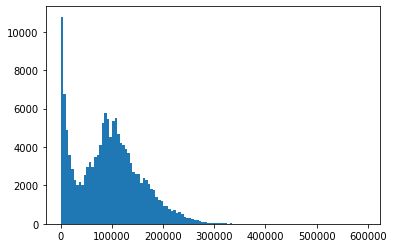

In [39]:
df2['TotalPayBenefits']
plt.hist(df2['TotalPayBenefits'],bins=list(range(0,600000,5000)));

In [40]:
df_fm=df2.groupby(['Year'])['TotalPayBenefits'].agg([np.median,np.mean, np.max])
df_fm

,median,mean,amax
Year,,,
2011,68219.910,71723.959868,567595.43
2012,101727.830,100460.293212,407274.78
2013,101944.325,101374.820615,425815.28
2014,101136.720,100257.243535,510732.68



 median и mean расположены  относительно близко. Max значение зарплаты примерно в 4 раза выше   median и mean.
**Принято решение в качестве меры центральной тенденции использовать median.

Вызывают вопросы min значения данной выборки.max значения допускаем за счет зарплат высоких должностей в группах.

Посмотрим на  max значения по уровню  базовых оплат 'BasePay' . Работаем с df2 размеченный


In [41]:
#Обозначим группы/год  одной переменной для удобства при дальнейшем использовании
all_group = ['office','police','medical','worker','services', 'operator','engineer',
     'public','fire','technicserv','attorney','transport','manager', 'finance','construction', 'trade']
year_sp=[2011,2012,2013,2014]

In [42]:
#df_city=df.groupby(['city_type'])['ml_balance','cl_balance_0m', 'loan_balance_0m','min_loan_balance_1q','max_loan_balance_1q','avg_loan_balance_1Y'].mean().reset_index()
df2_1=df2.groupby(['group1'])['BasePay', 'JobTitle'].max().reset_index()



In [33]:
df2_gr

,group1,JobTitle,BasePay
83274,art,Painter Supervisor 2,98123.53
73003,attorney,District Attorney,252221.06
111259,construction,Landscape Architect Assoc 2,190189.02
80725,employment,Employment & Training Spec 6,117504.00
73476,engineer,Engineer/Architect Principal,201705.50
2176,finance,PRINCIPAL ADMINISTRATIVE ANALYST,144868.95
72926,fire,"Chief, Fire Department",313686.01
110585,manager,Manager VIII,240008.92
110532,medical,Asst Med Examiner,318835.49
110547,office,"Administrator, DPH",282619.96


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text xticklabel objects>)

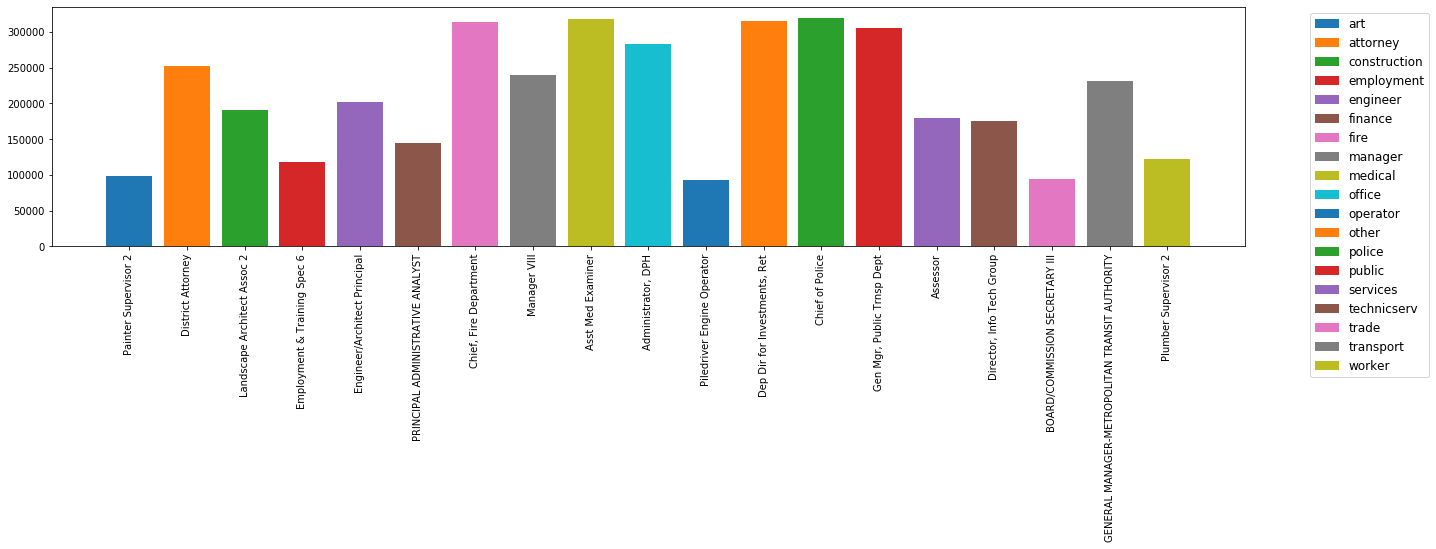

In [35]:
plt.figure(figsize=(20,5))

for group, JobTitle, pay in zip(df2_gr['group1'].to_list(), df2_gr['JobTitle'].to_list(),df2_gr['BasePay'].to_list() ):
    plt.bar(JobTitle, pay, label=group)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=12) 
plt.tight_layout()#вынесение легенды
#plt.legend(loc='upper left')
plt.xticks(rotation='vertical')


Выборка max базовых оплат 'BasePay' по группам показала, что max значения встречаюся как на руководящих
должностях, так и  у специалистов. 

Точечно просмотрим  max  значения 'OvertimePay', 'OtherPay', 'Benefits'

In [45]:
df2[df2['JobTitle']=='CAPTAIN III (POLICE DEPARTMENT)'].head(2)
#выборка по должности CAPTAIN III (POLICE DEPARTMENT) показывает характерным  уровень базовых оплат. Здесь наблюдается
#аномально высокая плата за  переработку сотрудника, что оказывает влияние на общую з/п. Находится в рамках
#max значения зарплат в США по данным внешних источников ( до 2015 г. - 504 тыс долл. США в год)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,JobTitle_key_words_list,EmployeeName_key_words_list,group1
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,captain iii police department,gary jimenez,police
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,captain iii police department,albert pardini,police


In [46]:
df2[df2['OtherPay']==df2['OtherPay'].max()]#очень высокая позиция по должности.Допускаем такое max  значение.
# также наблюдается max значение суммарного дохода TotalPayBenefits, что также допускаем. 
#Находится в рамках max значения зарплат в США по данным внешних источников ( до 2015 г. - 504 тыс долл. США в год)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,JobTitle_key_words_list,EmployeeName_key_words_list,group1
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,0.0,567595.43,567595.43,2011,general managermetropolitan transit authority,nathaniel ford,transport


In [47]:
df2[df2['Benefits']==df2['Benefits'].max()]#очень высокая позиция по должности.Допускаем такое max  значение.
#Находится в рамках max значения зарплат в США по данным внешних источников ( до 2015 г. - 504 тыс долл. США в год)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,JobTitle_key_words_list,EmployeeName_key_words_list,group1
110533,110534,William J Coaker Jr.,Chief Investment Officer,257340.0,0.0,82313.7,96570.66,339653.7,436224.36,2014,chief investment officer,william j coaker jr,police


Вывод. Сотрудники с  max  выплатами  Employee занимают высокие позиции JobTitle. 
Выше проведена горизонтальная арифметическая  проверка для исключения опечатки в данных.
Находится в рамках max значения зарплат в США (по данным внешних источников- около 504 тыс. долл США в год (с учетом бонусов))

Вызывают вопрос минимальные значения зарплат. Похоже, что это подработки/доплаты. Посмотрим по df


In [48]:
min_salary_usa=15080 #min уровень зарплаты в США в USD до 2015 г. по данным внешних источников
df2_nul=df2[df2['TotalPayBenefits']<min_salary_usa] 


In [49]:
df2_nul['group1'].unique()#Представлены все группы.


array(['attorney', 'worker', 'other', 'medical', 'services', 'manager',
       'finance', 'engineer', 'office', 'public', 'police', 'transport',
       'technicserv', 'trade', 'art', 'operator', 'employment', 'fire',
       'construction'], dtype=object)

In [50]:
df2_nul['Year'].unique()#Представлены во всех временных интервалах.

array([2011, 2012, 2013, 2014], dtype=int64)

In [51]:
len(df2_nul)/len(df2)*100

15.21568786392683

Вывод: по min значениям-22,5 тыс работников (15% от общего объемов данных) имеют уровень заработной платы ниже min по США
Такие работники представлены во всех выделенных группах. 

Посмотрим представление Box plot по видам выплат:

In [57]:
df_data=df_data1=df2[['BasePay','OvertimePay','OtherPay','TotalPay','Benefits', 'TotalPayBenefits']]

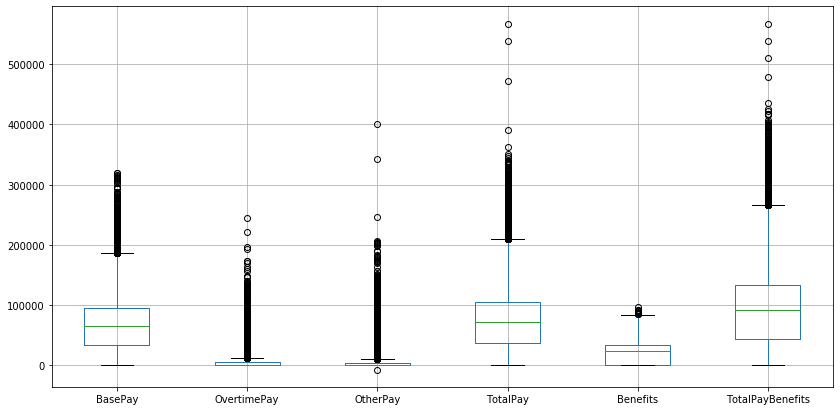

In [58]:
df_data.boxplot(figsize = (14, 7))

Box plot

Центром является медиана значений. Верхняя граница -3 квартиль и Нижняя граница- 1 квартиль. Разность между 3 м и 1-м  квартилем
-межквартильный размах. Отложим 1,5 межквартильных размаха вверх от 3 квартиля и 1,5 межквартильных размахов вниз
от 1-го квартиля. Границы и будут конец усов квартиля.
По первому приближению наблюдается, что по всем  видам выплат есть некоторое количество  данных, лежащих выше границы Box plot. По оплатам 'OvertimePay', 'OtherPay' медиана близка к нулю. Распределение отличное от нормального. 


In [59]:
df_data1=df_data.sum()
df_data1['BP/TP%'] = df_data1['BasePay']/df_data1['TotalPay']*100
df_data1['OP/TP%'] =df_data1['OvertimePay']/df_data1['TotalPay']*100
df_data1['Ot/TP%'] = df_data1['OtherPay']/df_data1['TotalPay']*100
df_part=df_data1[['BP/TP%','OP/TP%','Ot/TP%']]
df_part

BP/TP%    88.341603
OP/TP%     6.788143
Ot/TP%     4.870255
dtype: float64

Вывод:
-для дальнейшего анализа для 'BasePay','TotalPay', 'TotalPayBenefits' принято решение в качестве меры центральной тенденции выбрать median.Так как наблюдается большой разрыв между max и mean/median зарплатами в группах. Здесь распределение близко к нормальному. По оплатам 'OvertimePay', 'OtherPay' распределение отличное от нормального. Но их доля в составе 'TotalPay', 'TotalPayBenefits' мала -6.78% и 4.87%.

IV. Статический анализ даных. Далее работаем с df2_st_an,с включением  представительных групп 

In [55]:

df2_st_an=df2[df2.group1.isin(all_group)]
df2_st_an.head(2)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,JobTitle_key_words_list,EmployeeName_key_words_list,group1
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,general managermetropolitan transit authority,nathaniel ford,transport
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,captain iii police department,gary jimenez,police


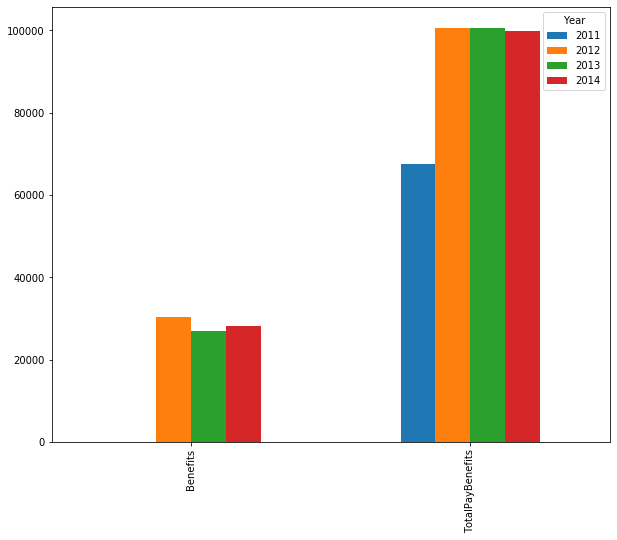

In [56]:
#Динамика зарплаты по годам
df_3=df2_st_an.groupby(['Year'])[ 'Benefits','TotalPayBenefits'].median().reset_index()
df_3.set_index('Year', inplace=True)
df_3=df_3.T
df_3.plot(kind='bar', figsize=(10, 8))


Замечание:Наблюдается отсутствие 'Benefits' в 2011 году. Допущения:
-кризис США 2011 (вторая волна кризиса  2008 года). Также в 2011 году по данным внешних источников наблюдался самый высокий
уровень инфляции в США за 4 рассматриваемых в выборке  года;
-данные пропущены.
Принято решение оставить так, как есть, так как при экстраполяции данных 'Benefits' с последующих лет на 2011 год не 
известен понижающий коэффициент за счет негативных макроэкономических событий 2011 года.
 
Самый высокий уровень зарплат в Сан- Франциско наблюдался в  2012,2013 году.
Самый низкий - в 2011 году

In [57]:
df2_2011=df2_st_an[df2['Year']==2011]
df2_2011['Benefits'].sum()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.0

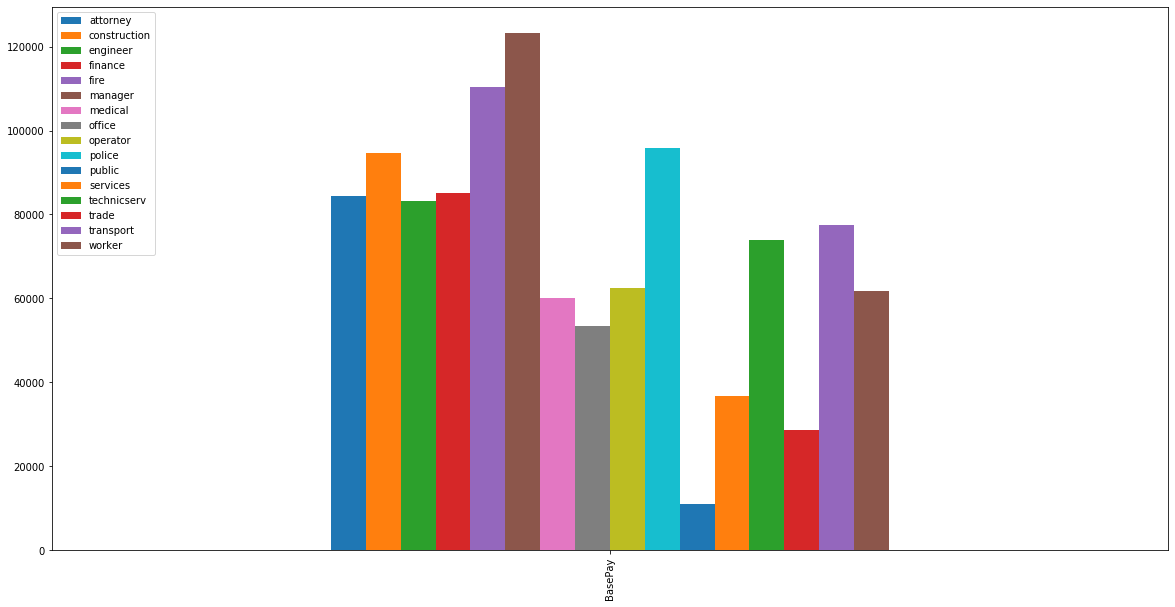

In [58]:
#Как распределяется базовая оплата между разными группами.
df_2=df2_st_an.groupby(['group1'])['BasePay'].median().reset_index()
df_2.set_index('group1', inplace=True)
df_2=df_2.T
df_2.plot(kind='bar', figsize=(20, 10))
plt.legend(loc='upper left')

In [59]:
dbp=df2_st_an.groupby(['group1'])['BasePay'].median().reset_index()
dbp.sort_values(by='BasePay', ascending=False)

,group1,BasePay
5,manager,123290.700
4,fire,110466.005
9,police,95912.040
1,construction,94757.660
3,finance,85185.065
0,attorney,84492.705
2,engineer,83160.045
14,transport,77580.410
12,technicserv,73951.900
8,operator,62582.555


За период 2011-2014 гг.:
-max базовая оплата (median) на группу manager
-min базовая оплата (median) на группу public

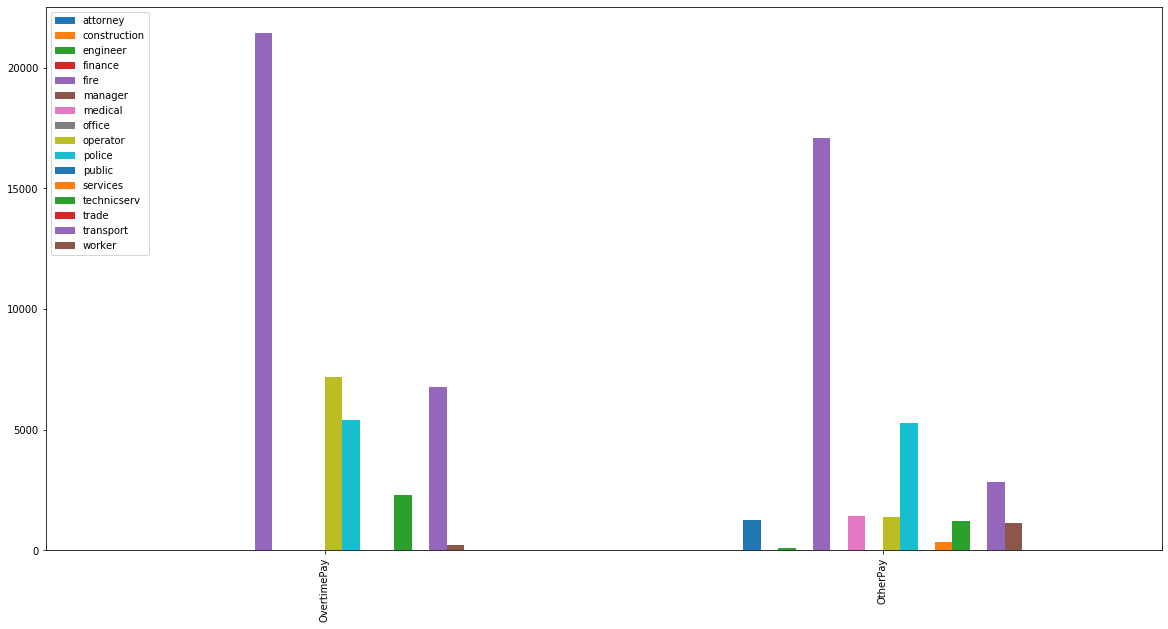

In [60]:
#Как распределяются сверхурочная работа, прочие выплаты между разными группами
df_2=df2_st_an.groupby(['group1'])['OvertimePay', 'OtherPay'].median().reset_index()
df_2.set_index('group1', inplace=True)
df_2=df_2.T
df_2.plot(kind='bar', figsize=(20, 10))
plt.legend(loc='upper left')

За период 2011-2014 гг.:

-max оплата за сверхурочную работу  на группу fire;
-min оплата за сверхурочную работу  - на группы attorney, construction, engineer, finance, manager, medical, office,public,services, trade;

-max оплата льгот  на группу fire;
-min оплата льгот   - на  группы construction, finance, manager,office,trade


In [61]:
df2_st_an_o=df2_st_an.groupby(['group1'])['OvertimePay'].median().reset_index()
df2_st_an_o=df2_st_an_o.sort_values(by='OvertimePay', ascending=False)
df2_st_an_o

,group1,OvertimePay
4,fire,21446.025
8,operator,7198.615
14,transport,6749.940
9,police,5397.780
12,technicserv,2281.440
15,worker,208.430
0,attorney,0.000
1,construction,0.000
2,engineer,0.000
3,finance,0.000


In [62]:
df2_st_an_ot=df2_st_an.groupby(['group1'])['OtherPay'].median().reset_index()
df2_st_an_ot=df2_st_an_ot.sort_values(by='OtherPay', ascending=False)
df2_st_an_ot

,group1,OtherPay
4,fire,17100.570
9,police,5288.030
14,transport,2831.400
6,medical,1430.000
8,operator,1385.435
0,attorney,1249.500
12,technicserv,1230.590
15,worker,1141.030
11,services,358.440
2,engineer,80.000


V. Динамический анализ изменения данных по периоду.

посмотрим на median, mean, amax в динамике.

In [63]:
df_fm=df2_st_an.groupby(['Year'])['TotalPayBenefits'].agg([np.median,np.mean, np.max])
df_fm

,median,mean,amax
Year,,,
2011,67632.35,71353.977185,567595.43
2012,100562.77,99861.267087,407274.78
2013,100681.68,100834.938015,425815.28
2014,99897.60,99659.773594,479652.21


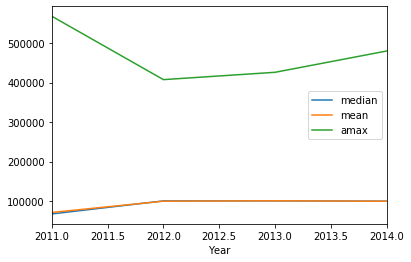

In [64]:
df_fm.plot()
plt.rcParams["figure.figsize"] = (10,8)

In [65]:
df_fm['(amax/(median+mean)/2)']=df_fm['amax']/((df_fm['median']+df_fm['mean'])/2)
df_fm

,median,mean,amax,(amax/(median+mean)/2)
Year,,,,
2011,67632.35,71353.977185,567595.43,8.167644
2012,100562.77,99861.267087,407274.78,4.064131
2013,100681.68,100834.938015,425815.28,4.226106
2014,99897.60,99659.773594,479652.21,4.807161


Обратим внимание, что среднее и медианное значение расположены близко друг к другу, Это позволяет 
говорить о нормальном распределении  данных. 
За период 2011-2012 наблюдается снижение максимальных зарплат  и рост средних/медианных зарплат. 
За период 2013 -2014 год наблюдается рост максимальных зарплат  при  стабильном уровне средних/медианных зарплат.
Наблюдается превышение max зарплат над средними/медианными(более,
чем в 4 раза).

Заработную плату в рамках данного исследования определяем, как 'TotalPayBenefits' на основании данных из внешнего источника.
в котором говорится,что заработная плата (оплата труда работника) - вознаграждение за труд , а также компенсационные выплаты (доплаты и надбавки компенсационного характера) и стимулирующие выплаты (доплаты и надбавки стимулирующего характера, премии и иные поощрительные выплаты).

In [66]:
df_4=df2_st_an.groupby(['Year', 'group1'])['TotalPayBenefits'].mean().reset_index()
df_4_1=df2_st_an.groupby(['Year', 'group1'])['TotalPayBenefits'].median().reset_index()
df_4_2=df2_st_an.groupby(['Year', 'group1'])['TotalPayBenefits'].max().reset_index()

Как распределяется бюджет на разные группы (department) с течением времени

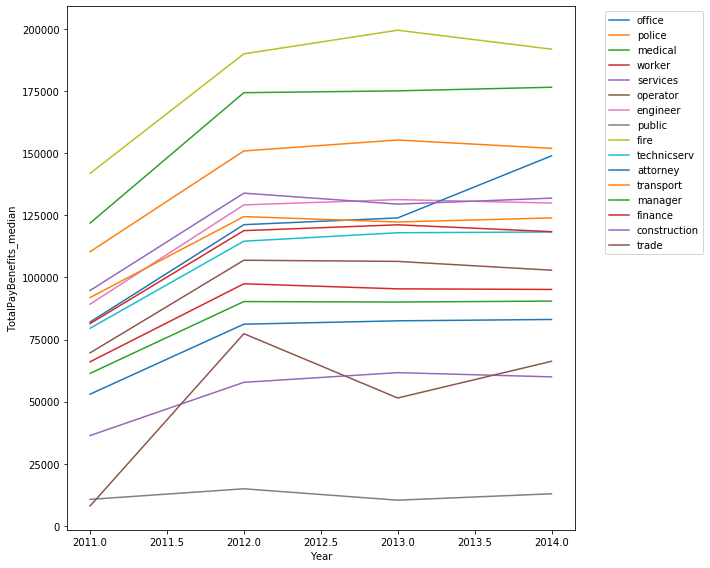

In [67]:
for  group in all_group:
    df_group = df_4_1[df_4_1['group1']==group]
    plt.plot(df_group['Year'], df_group['TotalPayBenefits'],label=group)#,kind='scatter')
    plt.legend() 

plt.xlabel('Year')  
plt.ylabel('TotalPayBenefits_median')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left') 
plt.tight_layout()#вынесение легенды

plt.rcParams["figure.figsize"] = (20,15)



В период с 2011 по 2012 года наблюдается рост median зарплат 'TotalPayBenefits'по всем группам. 
В период с 2012 по 2013 год наблюдается приемущественно стабилизация уровня зарплат в разрезе групп, за исключением групп:
-fire(пожарные)-рост;
-police- незначительный рост;
-trade-снижение.

В период 2013-2014 год:
-снижение зарплаты по группе fire;
-рост зарплат по группам trade, atterney.
Изменения монотонны за исключением групп trade, attorney.
max бюджет выделен на группу fire(пожарные службы)
min  бюджет выделен на группу public

Максимальные значения по группам (департаментам) по годам посмотрим на другом представлении в виде диаграмм.

In [68]:
data={}


for  group in all_group:
    df_group = df_4_2[df_4['group1']==group]
    data[group] = df_group['TotalPayBenefits'].values
data
    
    #plt.bar( df_group['Year'],df_group['TotalPayBenefits'])
    #df_group.plot.bar(x='Year',y='TotalPayBenefits')


{'office': array([316285.74, 360070.78, 362306.21, 365561.14]),
 'police': array([538909.28, 407274.78, 425815.28, 436224.36]),
 'medical': array([274550.25, 381643.11, 401736.88, 479652.21]),
 'worker': array([168912.31, 219454.51, 213269.64, 226121.58]),
 'services': array([164425.  , 226380.12, 222342.91, 240735.06]),
 'operator': array([148711.28, 197206.13, 194195.79, 194246.76]),
 'engineer': array([179123.44, 240088.8 , 254521.86, 258022.86]),
 'public': array([198027.44, 376002.11, 386168.49, 379918.72]),
 'fire': array([326373.19, 386807.48, 422353.4 , 417435.1 ]),
 'technicserv': array([332343.61, 389496.02, 252675.52, 269001.26]),
 'attorney': array([234848.11, 301121.44, 313294.34, 314612.09]),
 'transport': array([567595.43, 359447.75, 270383.15, 252473.84]),
 'manager': array([230377.83, 312675.26, 303272.22, 316810.09]),
 'finance': array([150722.45, 224901.08, 192665.9 , 189951.2 ]),
 'construction': array([174226.4 , 214502.72, 241263.11, 249023.8 ]),
 'trade': array([

In [69]:

df_4['Year'].unique()

array([2011, 2012, 2013, 2014], dtype=int64)

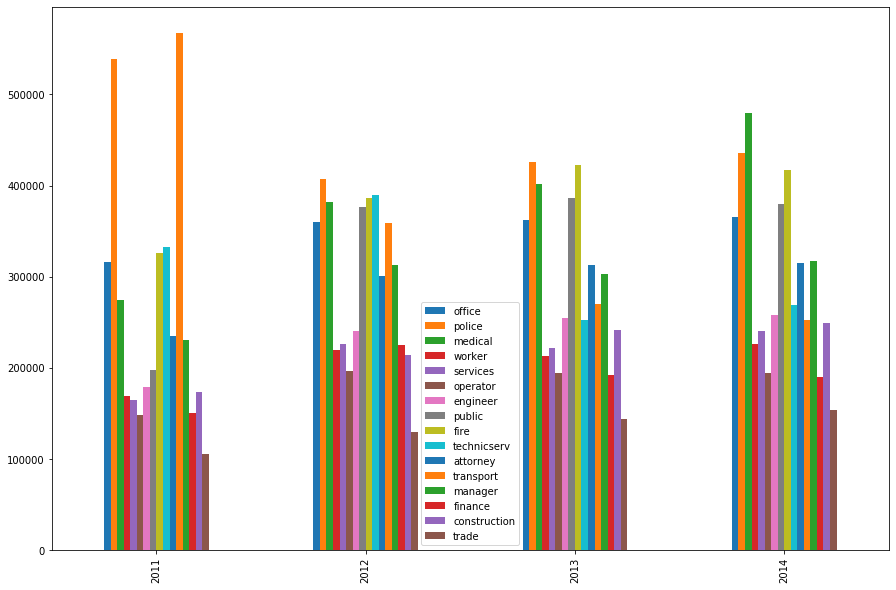

In [70]:

plotdata = pd.DataFrame(data, 
    index=df_4['Year'].unique())
    #index=np.array(year_sp)              
plotdata.plot(kind="bar", figsize=(15, 10))


Наблюдается max уровень зарплат по департаментам:
2011-transport;
2012-police;
2013-police;
2014-medical.
Следует отметить, что максимальные зарплаты чувствительны к изменениям .Уход/смена топ менеджера могла повлиять на изменение.

Анализ состава зарплат 'TotalPay'  поиск аномалий.

In [71]:
df_5=df2_st_an.groupby(['Year', 'group1'])['BasePay','OvertimePay', 'OtherPay' ].median().reset_index()
df_5.head()

,Year,group1,BasePay,OvertimePay,OtherPay
0,2011,attorney,79901.000,0.0,157.540
1,2011,construction,92607.795,0.0,0.000
2,2011,engineer,79820.000,0.0,208.960
3,2011,finance,81432.270,0.0,0.000
4,2011,fire,105934.660,18538.6,16682.035


Построим диаграммы по распределению со временем для каждого департамента по базовым, сверхурочным и льготам


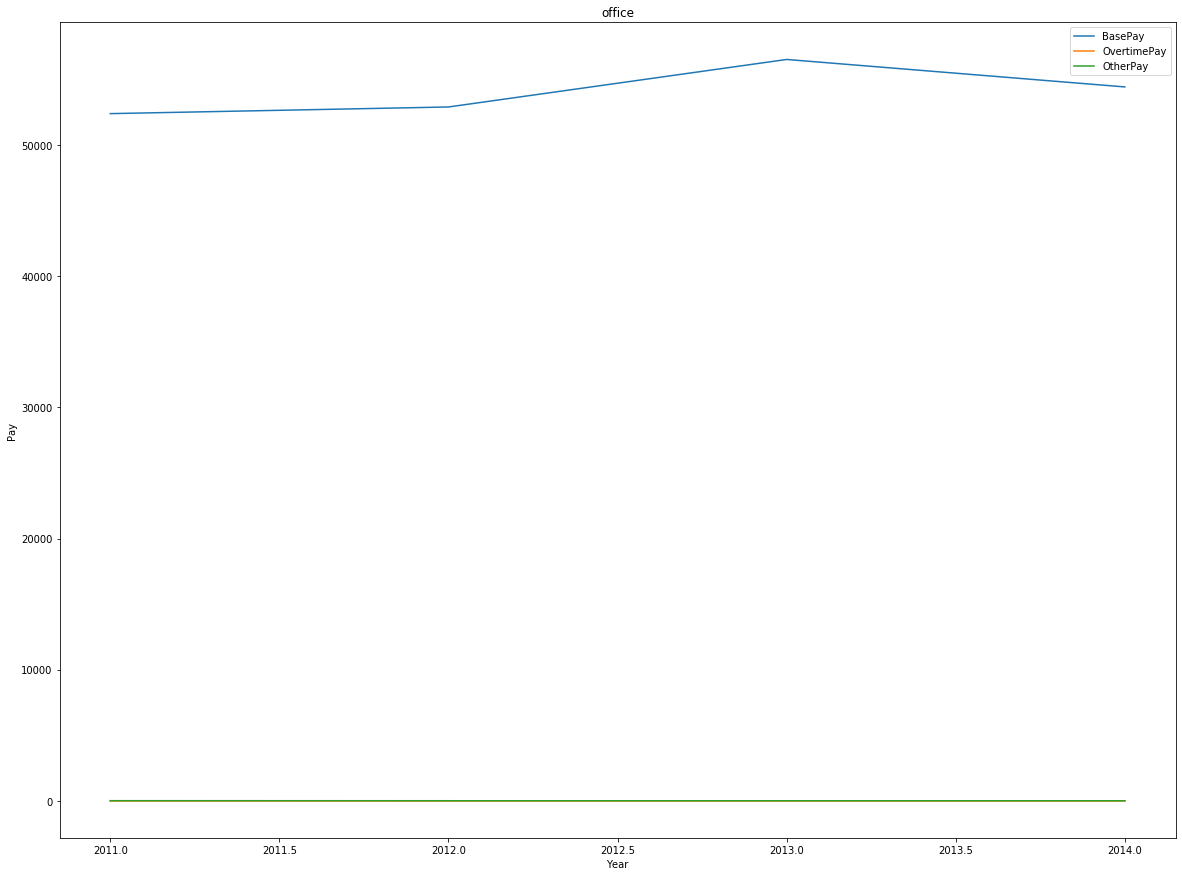

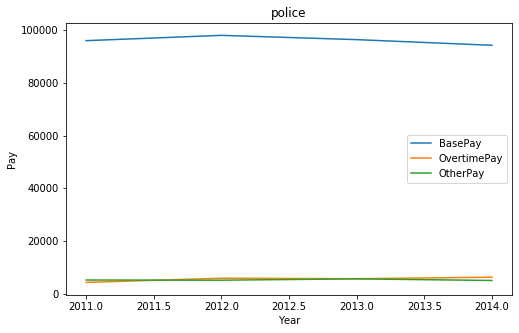

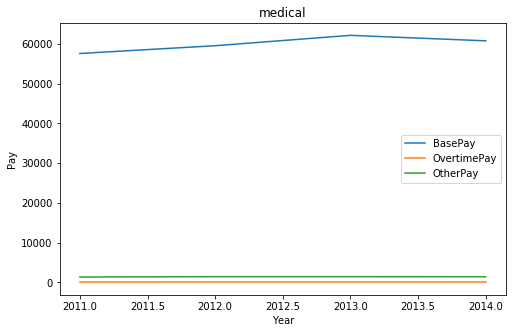

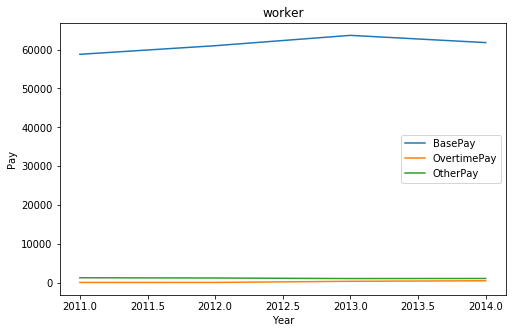

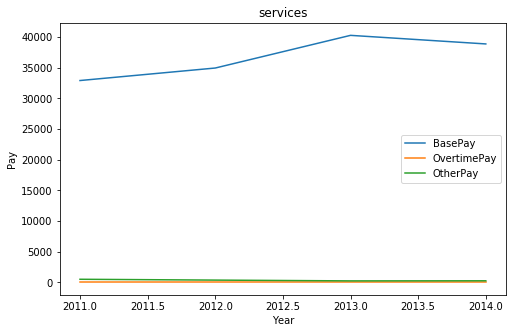

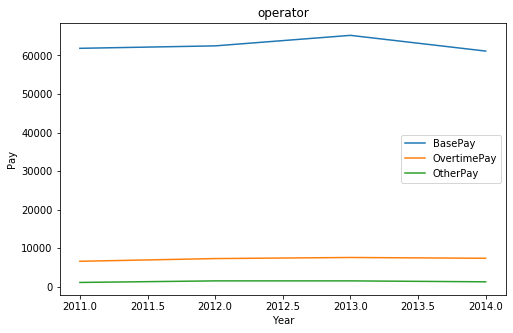

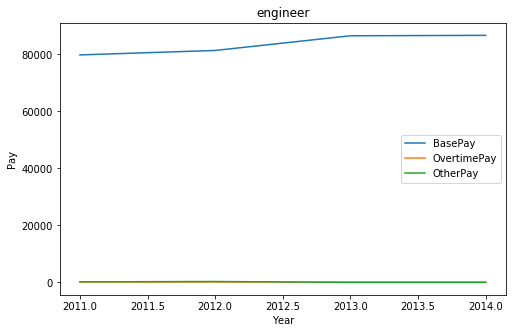

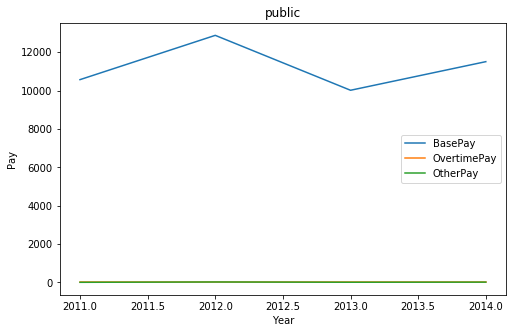

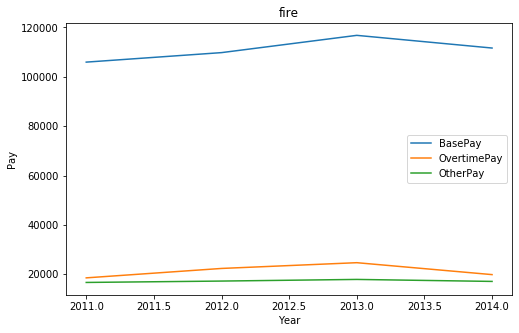

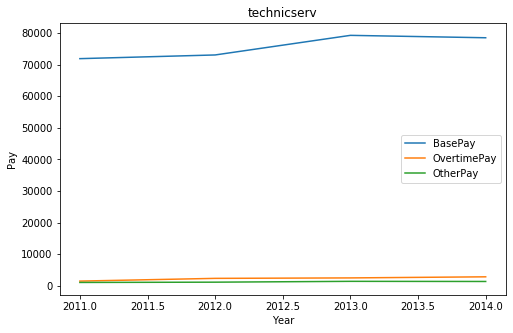

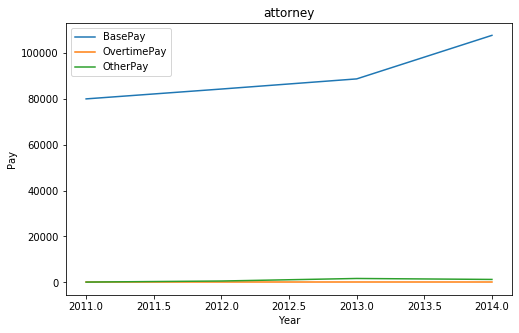

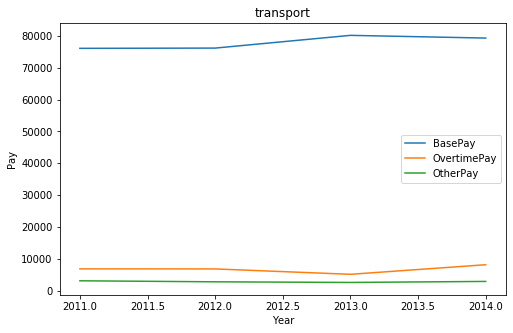

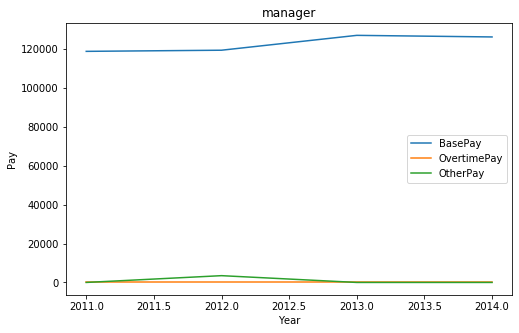

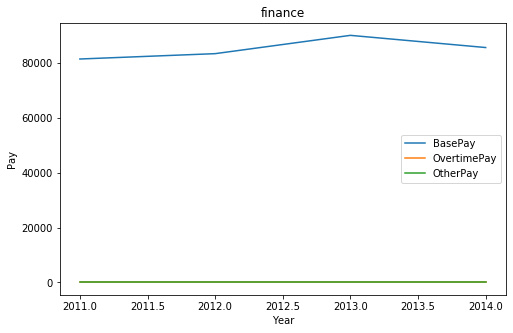

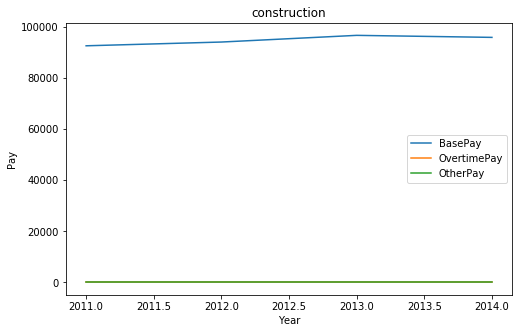

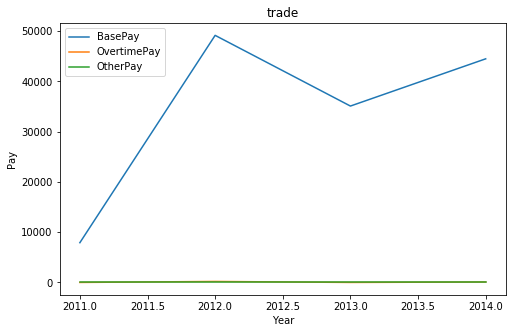

In [72]:
for  group in all_group:
    df_group = df_5[df_5['group1']==group]
    plt.plot(df_group['Year'], df_group['BasePay'],label='BasePay')
    plt.plot(df_group['Year'], df_group['OvertimePay'],label='OvertimePay')
    plt.plot(df_group['Year'], df_group['OtherPay'],label='OtherPay')
    #plt.plot(df_group['Year'], df_group['Benefits'],label='Benefits')
    plt.legend()
    plt.xlabel('Year')  
    plt.ylabel('Pay')
    plt.title(group)
    plt.show() 
       
    plt.rcParams["figure.figsize"] = (8,5)

Вывод: по всем представленным группам основной составляющей зарплаты 'TotalPay' является базовая оплата 'BasePay'
(что подтверждено высоким corr).Уровень прочих выплат сверхурочным 'OvertimePay'и льготам 'OtherPay' низок.
Но выделяются группы transport, fire(пожарные), operator, по которым уровень 'OvertimePay' выше. Посмотрим далее

In [73]:
df_part=df2_st_an.copy()

In [74]:
df_part.head(2)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,JobTitle_key_words_list,EmployeeName_key_words_list,group1
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,general managermetropolitan transit authority,nathaniel ford,transport
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,captain iii police department,gary jimenez,police


In [75]:
df_part_groupe1=df_part.groupby(['group1'])['BasePay','OvertimePay','OtherPay','TotalPay'].sum()
df_part_groupe1
df_part_groupe1['BP/TP%'] = df_part_groupe1['BasePay']/df_part_groupe1['TotalPay']*100
df_part_groupe1['OP/TP%'] =df_part_groupe1['OvertimePay']/df_part_groupe1['TotalPay']*100
df_part_groupe1['Ot/TP%'] = df_part_groupe1['OtherPay']/df_part_groupe1['TotalPay']*100
df_pg=df_part_groupe1[['BP/TP%','OP/TP%','Ot/TP%']].reset_index()
df_pg

,group1,BP/TP%,OP/TP%,Ot/TP%
0,attorney,96.027250,1.202843,2.769906
1,construction,98.057489,0.685255,1.257256
2,engineer,93.392267,2.686625,3.921108
3,finance,98.941146,0.159372,0.899482
4,fire,70.676589,18.403929,10.919483
5,manager,97.581175,0.049115,2.369710
6,medical,89.494842,4.631208,5.873950
7,office,96.623612,1.646948,1.729440
8,operator,79.527662,17.154441,3.317898
9,police,82.738351,9.661300,7.600349


статистики по median  по составляющим зарплат

In [76]:
df2_st_an_aa=df2_st_an.groupby(['group1'])['BasePay','OvertimePay', 'OtherPay','TotalPay'].median().reset_index()
df2_st_an_aa

,group1,BasePay,OvertimePay,OtherPay,TotalPay
0,attorney,84492.705,0.000,1249.500,89117.070
1,construction,94757.660,0.000,0.000,95148.875
2,engineer,83160.045,0.000,80.000,93109.140
3,finance,85185.065,0.000,0.000,85843.065
4,fire,110466.005,21446.025,17100.570,150316.410
5,manager,123290.700,0.000,0.000,124264.330
6,medical,60123.600,0.000,1430.000,64654.710
7,office,53561.530,0.000,0.000,55317.550
8,operator,62582.555,7198.615,1385.435,71436.830
9,police,95912.040,5397.780,5288.030,115234.245


In [77]:
pd.merge(df_pg, df2_st_an_aa, on='group1')

,group1,BP/TP%,OP/TP%,Ot/TP%,BasePay,OvertimePay,OtherPay,TotalPay
0,attorney,96.027250,1.202843,2.769906,84492.705,0.000,1249.500,89117.070
1,construction,98.057489,0.685255,1.257256,94757.660,0.000,0.000,95148.875
2,engineer,93.392267,2.686625,3.921108,83160.045,0.000,80.000,93109.140
3,finance,98.941146,0.159372,0.899482,85185.065,0.000,0.000,85843.065
4,fire,70.676589,18.403929,10.919483,110466.005,21446.025,17100.570,150316.410
5,manager,97.581175,0.049115,2.369710,123290.700,0.000,0.000,124264.330
6,medical,89.494842,4.631208,5.873950,60123.600,0.000,1430.000,64654.710
7,office,96.623612,1.646948,1.729440,53561.530,0.000,0.000,55317.550
8,operator,79.527662,17.154441,3.317898,62582.555,7198.615,1385.435,71436.830
9,police,82.738351,9.661300,7.600349,95912.040,5397.780,5288.030,115234.245


По высокой доле оплаты за сверхурочную работу OP/TP%- по некоторым департаментам можно сделать предположения:

-в Сан- Франциско много пожаров, так как уровень median  базовой оплаты  'BasePay' у подразделения  fire выше среднего 
(71464 USD ) и составляет 110466 USD, но доля переработки 'OvertimePay' в зарплате 'TotalPay' самая высокая из выборки
и составляет 18% ; 
-по группе operator средняя базовая оплата 'BasePay'  ниже среднего уровня и составляет 62583 USD, но за счет 
работы сверхурочно  (доля переработки 'OvertimePay' в зарплате 'TotalPay'   составляет 17%). В результате уровень зарплаты
'TotalPay' приближается к среднему уровню з/п  и составляет 71437. Можно предположить, что здесь  причина переработки - способ 
увеличения дохода за счет сверхурочной работы; 
-по группе transport  базовая оплата 'BasePay' выше среднего уровня и составляет 77580 USD (доля переработки 'OvertimePay' 
в зарплате 'TotalPay'   составляет 16,6 %) Высокая доля сверхурочной работы возможно по причине 2- способ поднять 
доход за счет переработки, а возможно это специфика процесса перевозок.

In [78]:
df2_st_an_aa[df2_st_an_aa['BasePay']==df2_st_an_aa['BasePay'].max()]

,group1,BasePay,OvertimePay,OtherPay,TotalPay
5,manager,123290.7,0.0,0.0,124264.33


In [79]:
df2_st_an_aa[df2_st_an_aa['BasePay']==df2_st_an_aa['BasePay'].min()]

,group1,BasePay,OvertimePay,OtherPay,TotalPay
10,public,10979.76,0.0,13.11,11161.03


In [80]:
df2_st_an_aa['BasePay'].mean()

71463.8515625

При точечном рассмотрении  max  значений по оплате сверхурочной работы  'OvertimePay' (ячейка ...) было выявлено аномально
высокое значение. Рассмотрим,  является ли это тенденцией, или исключением. Выявим  позиции, по которым 
плата за переработку 'OvertimePay' выше, чем базовая оплата 'BasePay'

In [81]:
df2_st_an.head(1)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,JobTitle_key_words_list,EmployeeName_key_words_list,group1
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,0.0,567595.43,567595.43,2011,general managermetropolitan transit authority,nathaniel ford,transport


In [82]:
df2_st_an['res'] =df2_st_an['BasePay']-df2_st_an['OvertimePay']
df2_st_an.head(1)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,JobTitle_key_words_list,EmployeeName_key_words_list,group1,res
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,0.0,567595.43,567595.43,2011,general managermetropolitan transit authority,nathaniel ford,transport,167411.18


In [83]:
res=df2_st_an[df2_st_an['res']<0]
res.head(2)
res1=res.groupby(['group1'])['res',].sum().reset_index()
res1.sort_values(by='res', ascending=False)

,group1,res
1,engineer,-244.33
7,public,-644.00
0,attorney,-3158.24
8,services,-22730.22
5,operator,-52995.73
4,office,-90334.33
11,worker,-100036.01
9,technicserv,-163673.94
3,medical,-318500.14
2,fire,-392053.61


In [84]:
res["group1"].value_counts()# количество сотрудников 'OvertimePay'> 'BasePay'

office         91
transport      78
medical        68
police         65
worker         34
fire           30
services       16
technicserv    12
operator       11
attorney        4
engineer        1
public          1
Name: group1, dtype: int64

Посмотрим на JobTitle группы, которые выделяются- 'transport', 'police'

In [85]:
res[res['group1']=='transport'].head(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,JobTitle_key_words_list,EmployeeName_key_words_list,group1,res
72,73,LAWRENCE FREED,"ELECTRICAL TRANSIT MECHANIC, ASSISTANT SUPERVISOR",95770.80,118949.93,18743.90,0.0,233464.63,233464.63,2011,electrical transit mechanic assistant supervisor,lawrence freed,transport,-23179.13
88,89,EVETTE GEER-STEVENS,TRANSIT SUPERVISOR,88062.00,135159.38,7018.60,0.0,230239.98,230239.98,2011,transit supervisor,evette geerstevens,transport,-47097.38
103,104,EDWARD DENNIS,TRANSIT SUPERVISOR,88400.70,126778.88,7228.67,0.0,222408.25,222408.25,2011,transit supervisor,edward dennis,transport,-38378.18
114,115,CHARLES SCOTT,TRANSIT SUPERVISOR,88400.70,119951.72,11893.84,0.0,220246.26,220246.26,2011,transit supervisor,charles scott,transport,-31551.02
124,125,TYRONNE JULIAN,TRANSIT SUPERVISOR,88062.00,126725.82,2784.61,0.0,217572.43,217572.43,2011,transit supervisor,tyronne julian,transport,-38663.82
160,161,HAROLD BYRD,TRANSIT SUPERVISOR,88062.00,111199.78,11373.58,0.0,210635.36,210635.36,2011,transit supervisor,harold byrd,transport,-23137.78
166,167,THOMAS ALDANA,TRANSIT SUPERVISOR,90094.20,111323.49,8344.75,0.0,209762.44,209762.44,2011,transit supervisor,thomas aldana,transport,-21229.29
174,175,LAWRENCE LEE,ELECTRICAL TRANSIT SYSTEM MECHANIC,77580.40,115239.98,16089.38,0.0,208909.76,208909.76,2011,electrical transit system mechanic,lawrence lee,transport,-37659.58
180,181,DONALD BRYANT,ELECTRICAL TRANSIT SYSTEM MECHANIC,77580.36,119407.70,11220.57,0.0,208208.63,208208.63,2011,electrical transit system mechanic,donald bryant,transport,-41827.34
216,217,GERARDO PINTO,TRANSIT SUPERVISOR,89078.11,114105.85,773.70,0.0,203957.66,203957.66,2011,transit supervisor,gerardo pinto,transport,-25027.74


In [86]:
res[res['group1']=='police'].head(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,JobTitle_key_words_list,EmployeeName_key_words_list,group1,res
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,captain iii police department,gary jimenez,police,-89165.86
154,155,WHITNEY YEE,DEPUTY SHERIFF,86840.00,112320.96,13544.56,0.0,212705.52,212705.52,2011,deputy sheriff,whitney yee,police,-25480.96
231,232,BARRY BLOOM,DEPUTY SHERIFF,86840.00,102118.80,13390.01,0.0,202348.81,202348.81,2011,deputy sheriff,barry bloom,police,-15278.80
364,365,ANTONIO SANTIAGO,DEPUTY SHERIFF,86840.00,94362.36,11849.25,0.0,193051.61,193051.61,2011,deputy sheriff,antonio santiago,police,-7522.36
748,749,GARRETT EDWARDS,DEPUTY SHERIFF,83511.28,83945.39,9962.40,0.0,177419.07,177419.07,2011,deputy sheriff,garrett edwards,police,-434.11
1669,1670,JOSEPH TOOMEY,"INSPECTOR III, (POLICE DEPARTMENT)",9867.93,62600.83,85688.69,0.0,158157.45,158157.45,2011,inspector iii police department,joseph toomey,police,-52732.90
1887,1888,ANTONIO CASILLAS,"INSPECTOR III, (POLICE DEPARTMENT)",9868.00,77595.99,67354.28,0.0,154818.27,154818.27,2011,inspector iii police department,antonio casillas,police,-67727.99
3488,3489,TIMOTHY FOLEY,LIEUTENANT III (POLICE DEPARTMENT),5637.04,76614.78,53615.33,0.0,135867.15,135867.15,2011,lieutenant iii police department,timothy foley,police,-70977.74
4143,4144,ANTHONY FOTINOS,CAPTAIN III (POLICE DEPARTMENT),42738.00,47827.70,39904.72,0.0,130470.42,130470.42,2011,captain iii police department,anthony fotinos,police,-5089.70
9722,9723,GLENN SYLVESTER,"INSPECTOR III, (POLICE DEPARTMENT)",29604.01,35041.31,34158.44,0.0,98803.76,98803.76,2011,inspector iii police department,glenn sylvester,police,-5437.30


Вывод:  Выявлена тенденция по разным группам. Выделяются группы  transport, police. Среди этих групп по JobTitle:
-transport -SUPERVISOR(руководители) BasePay>=BasePay.median(по группе- 77580);
-police-SHERIFF, CAPTAIN III,INSPECTOR III, LIEUTENANT III- разный уровень должностей и  BasePay.

Рассмотрим экстремально высокие значения по заработной плате среди групп. Присутствуют ли они в каждой группе? 
Какова  их  доля?
Для этого определимся с границей экстремально высоких значений  з/п за пределами которой считаем з/п экстремально высокими для группы.
Воспользуемся правилом 3 sigm. Допускаем, что экстремально
высокие значения находятся за пределами mean+3*std


In [87]:
df2_mean=df2_st_an.groupby(['group1'])['TotalPayBenefits'].mean().reset_index()
df2_max=df2_st_an.groupby(['group1'])['TotalPayBenefits'].max().reset_index()
df2_mean_max=pd.merge(df2_mean, df2_max, on='group1')
df2_mean_max['max/mean']=df2_mean_max['TotalPayBenefits_y']/df2_mean_max['TotalPayBenefits_x']
df2_mean_max

,group1,TotalPayBenefits_x,TotalPayBenefits_y,max/mean
0,attorney,120228.138012,314612.09,2.616793
1,construction,114117.645283,249023.80,2.182167
2,engineer,107840.629182,258022.86,2.392631
3,finance,103500.773351,224901.08,2.172941
4,fire,178106.093930,422353.40,2.371359
5,manager,153813.768897,316810.09,2.059699
6,medical,88642.633197,479652.21,5.411078
7,office,65137.063423,365561.14,5.612183
8,operator,83656.543396,197206.13,2.357331
9,police,136407.558725,538909.28,3.950729


In [88]:
for  group in all_group:
    print(group)
    #plt.vlines([mean_-3*sko_, mean_+3*sko_],0,400)
    df_board=df2_st_an[df2_st_an['group1']==group]['TotalPayBenefits']
    mean_=df_board.mean()
    sko_=df_board.std()
    print(round((df_board>mean_+3*sko_).sum()/len(df_board)*100,3))
  

office
0.267
police
0.147
medical
0.327
worker
0.291
services
0.285
operator
0.0
engineer
0.0
public
0.696
fire
0.623
technicserv
0.068
attorney
0.0
transport
0.221
manager
0.0
finance
0.017
construction
0.0
trade
0.0


Вывод: В результате анализа данных по зарплате Сан- Франциско на основании полученной группировки по департаментам
выявлены  факторы,которые, предположительно, могут оказать негативное влияние на расходы по оплате труда по департаментам г. Сан- Франциско. 

При базовой оплате 'BasePay' ниже среднего уровня по определенным группам наблюдается увеличение зарплаты сотрудников 'TotalPay' за счет оплаты сверхурочных часов 'OvertimePay'. 
Можно выделить группы:
-operator;
-services;
-technicserv;
-transport;
-trade.

У сотрудников пожарного подразделения(fire) базовая оплата 'BasePay' выше  среднего уровня, переработки возможны, предположительно, из за некой экстремальной ситуации на производстве -возможно, большого количества пожаров в Сан- Франциско.

Наблюдаются аномально высокие значения по оплате переработки  'OvertimePay' по подразделениям с уровнем базовой оплаты 'BasePay' выше среднего. Следует выделить подразделение 'police' (сотрудники на разных должностях с разными  окладами), подразделение  transport (сотрудники на руководящих должностях с окладами BasePay>=BasePay.median по группе).

Так же Наблюдается превышение max зарплат над средними/медианными(более, чем в 4 раза).Выявлены экстремально высокие значения по заработным платам по группам. Определены их доли в общей выборке по группам. При допущении, что экстремально высокие значения находятся за пределами mean+3*std.
Здесь можно выделить группы:
-fire- 0.6%;
-public-0.5%;
-worker, medical,office,services-0.3% сотрудников.




Линейная регрессия

In [89]:
#Базовый df
df2_st_an.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,JobTitle_key_words_list,EmployeeName_key_words_list,group1,res
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,general managermetropolitan transit authority,nathaniel ford,transport,167411.18
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,captain iii police department,gary jimenez,police,-89165.86
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,captain iii police department,albert pardini,police,106650.95
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,wire rope cable maintenance mechanic,christopher chong,technicserv,21795.29
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,deputy chief of departmentfire department,patrick gardner,fire,124664.60


In [90]:
def prepare_data(df,name_group):
    df_group=df[df['group1']==name_group]
    features = df_group['Year'].to_numpy().reshape(-1, 1)
    target = df_group['TotalPayBenefits'].to_numpy()
    X_train,X_test,y_train, y_test = train_test_split(features,target, test_size=0.3, random_state=0)
        
    return (X_train,X_test,y_train, y_test)

In [91]:
def learning_model(X_train,X_test,y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_train_prediction = model.predict(X_train)
    y_test_prediction = model.predict(X_test)
    print("RMSE тестовой выборки LinearRegression: ",np.sqrt(mean_squared_error(y_test, y_test_prediction)))
    return model,y_train_prediction,y_test_prediction

In [109]:
#gr=df2_st_an['group1'].unique()
#gr

office
RMSE тестовой выборки LinearRegression:  36563.85139292411
рост зп 6388.7
предсказание ср зп на 2015 год 80928.2
средние зп на 2011-2014 год [55373.5 61762.2 68150.9 74539.5]


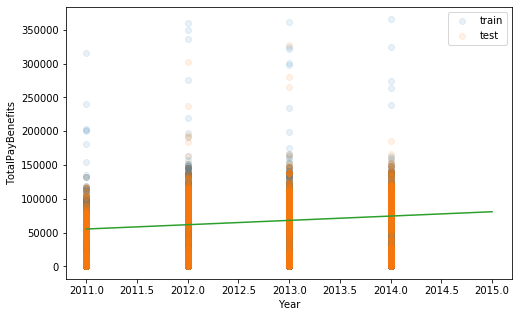

police
RMSE тестовой выборки LinearRegression:  57150.106167279715
рост зп 12482.6
предсказание ср зп на 2015 год 167426.9
средние зп на 2011-2014 год [117496.4 129979.  142461.7 154944.3]


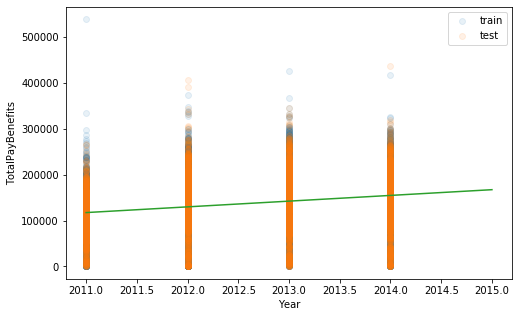

medical
RMSE тестовой выборки LinearRegression:  65488.17037192022
рост зп 7955.9
предсказание ср зп на 2015 год 108186.8
средние зп на 2011-2014 год [ 76363.1  84319.   92274.9 100230.9]


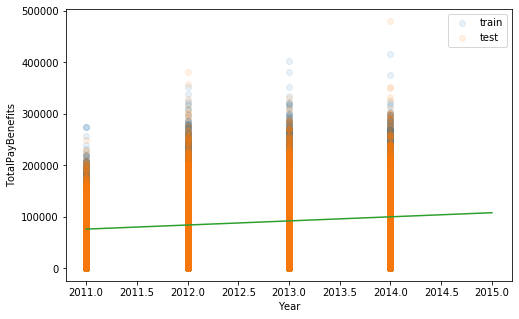

worker
RMSE тестовой выборки LinearRegression:  38404.26875863558
рост зп 7555.9
предсказание ср зп на 2015 год 102272.4
средние зп на 2011-2014 год [72048.7 79604.7 87160.6 94716.5]


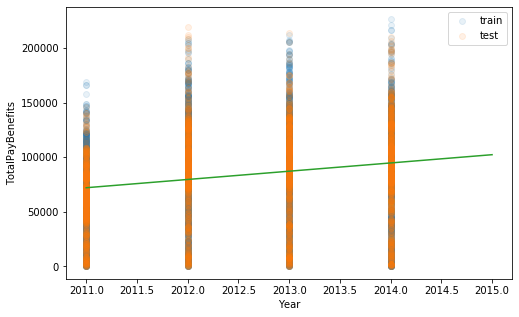

services
RMSE тестовой выборки LinearRegression:  36690.578984177526
рост зп 4982.1
предсказание ср зп на 2015 год 58502.0
средние зп на 2011-2014 год [38573.6 43555.7 48537.8 53519.9]


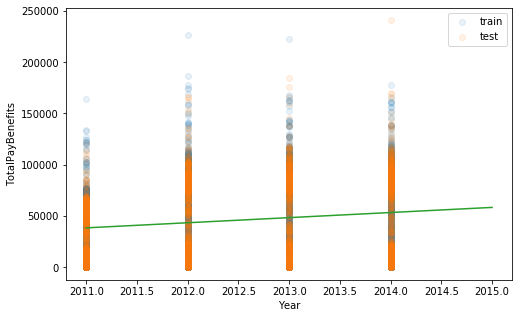

operator
RMSE тестовой выборки LinearRegression:  39585.693487209865
рост зп 7501.9
предсказание ср зп на 2015 год 102323.3
средние зп на 2011-2014 год [72315.5 79817.5 87319.4 94821.3]


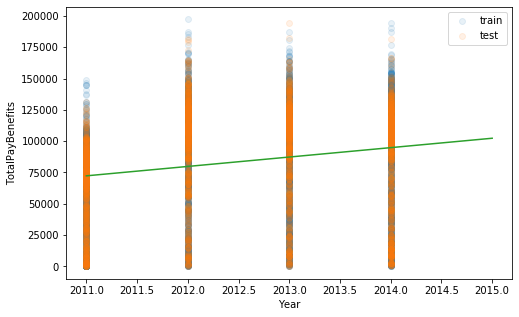

engineer
RMSE тестовой выборки LinearRegression:  55865.54898161323
рост зп 10749.6
предсказание ср зп на 2015 год 134523.5
средние зп на 2011-2014 год [ 91525.2 102274.8 113024.3 123773.9]


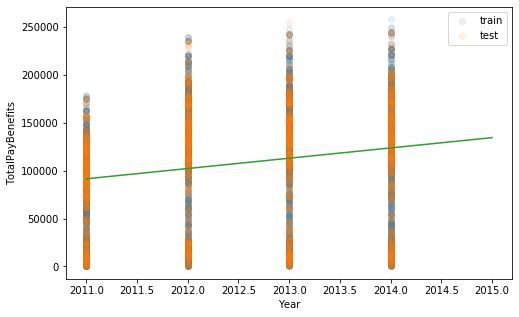

public
RMSE тестовой выборки LinearRegression:  42013.67753779585
рост зп 2631.8
предсказание ср зп на 2015 год 40209.7
средние зп на 2011-2014 год [29682.6 32314.4 34946.2 37577.9]


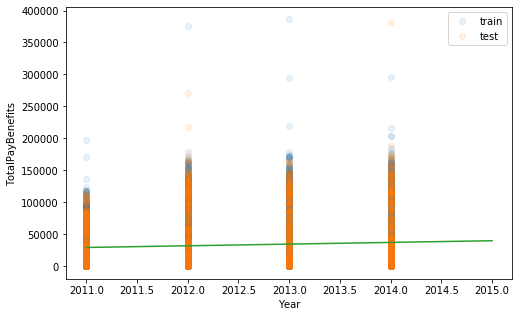

fire
RMSE тестовой выборки LinearRegression:  61749.83693430625
рост зп 13681.3
предсказание ср зп на 2015 год 211750.3
средние зп на 2011-2014 год [157025.1 170706.4 184387.7 198069. ]


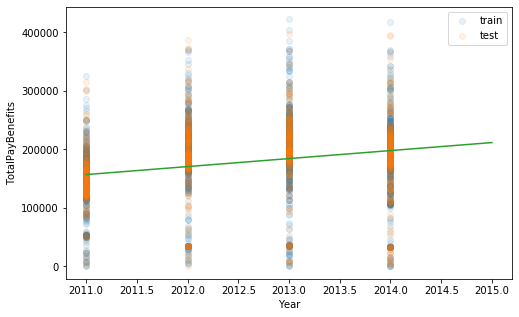

technicserv
RMSE тестовой выборки LinearRegression:  51470.074634910474
рост зп 9941.4
предсказание ср зп на 2015 год 127103.7
средние зп на 2011-2014 год [ 87338.2  97279.6 107220.9 117162.3]


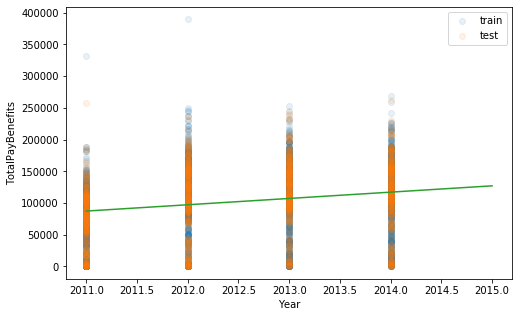

attorney
RMSE тестовой выборки LinearRegression:  69367.4768710909
рост зп 19004.9
предсказание ср зп на 2015 год 169973.7
средние зп на 2011-2014 год [ 93954.  112959.  131963.9 150968.8]


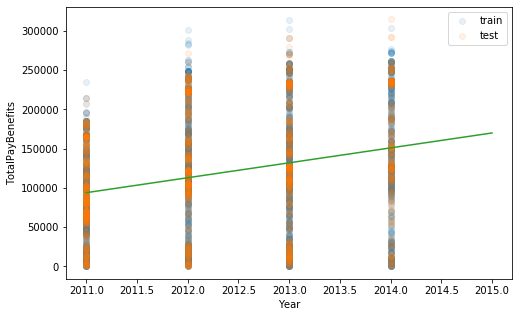

transport
RMSE тестовой выборки LinearRegression:  43816.08901082243
рост зп 7529.0
предсказание ср зп на 2015 год 133122.4
средние зп на 2011-2014 год [103006.5 110535.5 118064.5 125593.5]


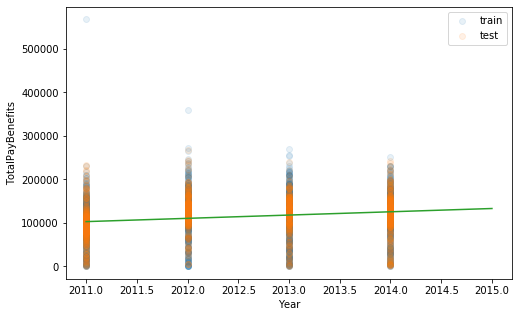

manager
RMSE тестовой выборки LinearRegression:  57563.736373281405
рост зп 17029.2
предсказание ср зп на 2015 год 196400.4
средние зп на 2011-2014 год [128283.7 145312.8 162342.  179371.2]


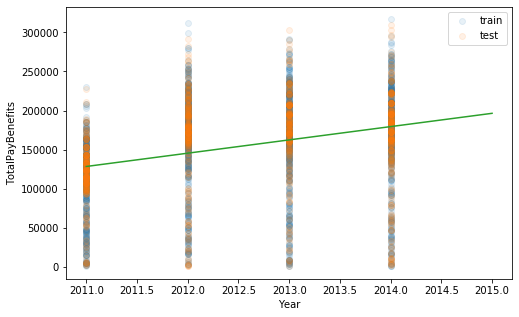

finance
RMSE тестовой выборки LinearRegression:  38913.35524005671
рост зп 10042.8
предсказание ср зп на 2015 год 128018.5
средние зп на 2011-2014 год [ 87847.3  97890.1 107932.9 117975.7]


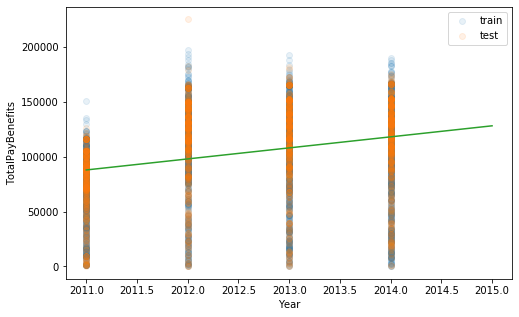

construction
RMSE тестовой выборки LinearRegression:  43761.04235737466
рост зп 10343.9
предсказание ср зп на 2015 год 138356.7
средние зп на 2011-2014 год [ 96981.2 107325.1 117669.  128012.9]


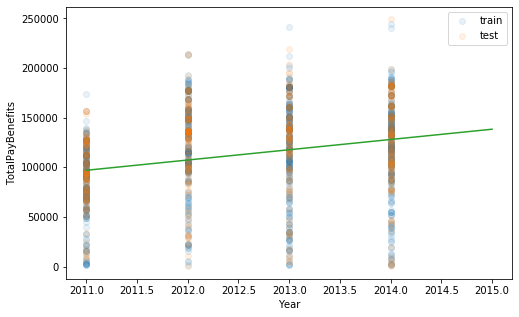

trade
RMSE тестовой выборки LinearRegression:  39465.098634968665
рост зп 9468.1
предсказание ср зп на 2015 год 67109.2
средние зп на 2011-2014 год [29236.7 38704.9 48173.  57641.1]


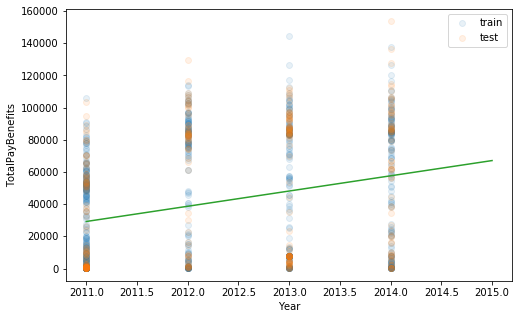

In [92]:
for obj in all_group:
    print(obj)
    X_train,X_test,y_train, y_test=prepare_data(df2_st_an, obj)
    model,y_train_prediction,y_test_prediction=learning_model(X_train,X_test,y_train, y_test)
    print('рост зп', (model.coef_[0]).round(1))

    X_plot=np.array([2011,2012,2013,2014,2015]).reshape(-1, 1)
    y_plot = model.predict(X_plot)
    print('предсказание ср зп на 2015 год', (y_plot[-1]).round(1))
    print('средние зп на 2011-2014 год', (y_plot[0:4:1]).round(1))
    
    plt.figure()
    plt.plot(X_train, y_train,'o',alpha=0.1)
    plt.plot(X_test, y_test,'o',alpha=0.1)
    plt.plot(X_plot, y_plot)
    plt.xlabel('Year')
    plt.ylabel('TotalPayBenefits')
    plt.legend(['train', 'test'])
    plt.show()
     

In [145]:
 X_plot=np.array([2011,2012,2013,2014,2015]).reshape(-1, 1)
 X_plot

array([[2011],
       [2012],
       [2013],
       [2014],
       [2015]])

Дополнительно был рассчитан 'угол роста' по целевому taget (model.coef)
по max рост з/п - у группы attorney
по min рост з/п - у группы public


In [146]:
X_plot=np.array([2011,2012,2013,2014,2015])
X_plot

array([2011, 2012, 2013, 2014, 2015])